In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from rfpimp import *
from sklearn.model_selection import train_test_split

C:\Users\jungj\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
merged_df = pd.read_csv("df_grouped_turnout.csv")
merged_df.head()

,Unnamed: 0,Unnamed: 0.1,ALAND,AWATER,BLKGRPCE,COUNTYFP,E11B19001e1,E11B19001e13,E11B19001e2,E11B19013e1,...,D01B01001e44-46,D01B01001e47-49,S07B15003e15-17,S07B15003e18-21,S07B15003e23-25,E11B19001e3-5,E11B19001e6-10,E11B19001e11-12,E11B19001e14-15,E11B19001e16-17
0,0,0,337300,0,3,59,688,83,115,62019.0,...,44.0,18.0,135.0,405.0,87.0,60.0,114.0,156.0,88.0,72.0
1,1,1,686935,0,1,59,1280,262,61,82353.0,...,121.0,44.0,231.0,780.0,312.0,40.0,179.0,223.0,172.0,343.0
2,2,2,209303,0,2,59,321,17,6,23924.0,...,68.0,71.0,109.0,179.0,120.0,170.0,30.0,59.0,0.0,39.0
3,3,3,323900,0,2,59,417,40,0,112132.0,...,44.0,8.0,121.0,279.0,151.0,47.0,53.0,31.0,152.0,94.0
4,4,4,323906,0,1,59,370,38,7,106250.0,...,47.0,58.0,85.0,130.0,122.0,17.0,27.0,91.0,33.0,157.0


In [7]:
merged_df.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
ALAND              0
AWATER             0
BLKGRPCE           0
                  ..
E11B19001e3-5      0
E11B19001e6-10     0
E11B19001e11-12    0
E11B19001e14-15    0
E11B19001e16-17    0
Length: 94, dtype: int64

In [9]:
nans = merged_df.loc[:, (merged_df.isnull().sum() > 0)].columns.tolist()

In [10]:
new_df = merged_df.fillna(0)

In [11]:
no_nans = new_df.loc[:, (new_df.isnull().sum() > 0)].columns.tolist()

In [12]:
print(nans)
print(no_nans)

['E11B19013e1', 'E12B19113e1', 'E12B20002e1', 'E12B20002e2', 'E12B20002e3', 'H18B25082e1', 'H18B25082e2', 'H18B25082e3', 'D02B01002Be1', 'D02B01002Ce1', 'D02B01002De1', 'D02B01002Ee1', 'D02B01002Fe1', 'D02B01002Ge1', 'D02B01002Ie1']
[]


In [13]:
new_df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
ALAND                int64
AWATER               int64
BLKGRPCE             int64
                    ...   
E11B19001e3-5      float64
E11B19001e6-10     float64
E11B19001e11-12    float64
E11B19001e14-15    float64
E11B19001e16-17    float64
Length: 94, dtype: object

In [14]:
clean_df = new_df.drop(['FUNCSTAT', 'MTFCC', 'Unnamed: 0', 'Unnamed: 0.1', 'INTPTLAT', 'INTPTLON', 'Shape__Area', 'Shape__Length', 'TRACTCE', 'OBJECTID', 'STATEFP', 'GEOID_Data', 'NAMELSAD', 'ALAND', 'AWATER',  'BLKGRPCE', 'COUNTYFP'], axis=1)
clean_df

,E11B19001e1,E11B19001e13,E11B19001e2,E11B19013e1,E11B19025e1,E11B19055e2,E11B19059e2,E12B19113e1,E12B20002e1,E12B20002e2,...,D01B01001e44-46,D01B01001e47-49,S07B15003e15-17,S07B15003e18-21,S07B15003e23-25,E11B19001e3-5,E11B19001e6-10,E11B19001e11-12,E11B19001e14-15,E11B19001e16-17
0,688,83,115,62019.0,55804400,83,40,64800.0,38958.0,37778.0,...,44.0,18.0,135.0,405.0,87.0,60.0,114.0,156.0,88.0,72.0
1,1280,262,61,82353.0,130566800,198,101,111375.0,59471.0,54193.0,...,121.0,44.0,231.0,780.0,312.0,40.0,179.0,223.0,172.0,343.0
2,321,17,6,23924.0,17866200,149,28,38708.0,27750.0,32019.0,...,68.0,71.0,109.0,179.0,120.0,170.0,30.0,59.0,0.0,39.0
3,417,40,0,112132.0,62904600,79,46,114635.0,55281.0,54653.0,...,44.0,8.0,121.0,279.0,151.0,47.0,53.0,31.0,152.0,94.0
4,370,38,7,106250.0,51478600,114,56,153846.0,66620.0,0.0,...,47.0,58.0,85.0,130.0,122.0,17.0,27.0,91.0,33.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,931,161,80,70795.0,71901100,121,119,60814.0,32212.0,31538.0,...,59.0,17.0,266.0,395.0,166.0,29.0,230.0,153.0,222.0,56.0
72,474,54,68,44000.0,29781700,103,0,34792.0,23793.0,0.0,...,52.0,13.0,321.0,280.0,13.0,38.0,143.0,59.0,41.0,71.0
73,632,133,13,79153.0,58369900,89,83,79389.0,34906.0,48671.0,...,20.0,0.0,132.0,217.0,174.0,48.0,114.0,89.0,133.0,102.0
74,613,55,18,90417.0,64527400,299,205,95750.0,53594.0,55950.0,...,82.0,178.0,190.0,393.0,146.0,51.0,146.0,78.0,93.0,172.0


In [15]:
clean_df.set_index('GEOID', inplace = True)
clean_df

,E11B19001e1,E11B19001e13,E11B19001e2,E11B19013e1,E11B19025e1,E11B19055e2,E11B19059e2,E12B19113e1,E12B20002e1,E12B20002e2,...,D01B01001e44-46,D01B01001e47-49,S07B15003e15-17,S07B15003e18-21,S07B15003e23-25,E11B19001e3-5,E11B19001e6-10,E11B19001e11-12,E11B19001e14-15,E11B19001e16-17
GEOID,,,,,,,,,,,,,,,,,,,,,
60590632013,688,83,115,62019.0,55804400,83,40,64800.0,38958.0,37778.0,...,44.0,18.0,135.0,405.0,87.0,60.0,114.0,156.0,88.0,72.0
60590638071,1280,262,61,82353.0,130566800,198,101,111375.0,59471.0,54193.0,...,121.0,44.0,231.0,780.0,312.0,40.0,179.0,223.0,172.0,343.0
60590637022,321,17,6,23924.0,17866200,149,28,38708.0,27750.0,32019.0,...,68.0,71.0,109.0,179.0,120.0,170.0,30.0,59.0,0.0,39.0
60590633022,417,40,0,112132.0,62904600,79,46,114635.0,55281.0,54653.0,...,44.0,8.0,121.0,279.0,151.0,47.0,53.0,31.0,152.0,94.0
60590633021,370,38,7,106250.0,51478600,114,56,153846.0,66620.0,0.0,...,47.0,58.0,85.0,130.0,122.0,17.0,27.0,91.0,33.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60590639063,931,161,80,70795.0,71901100,121,119,60814.0,32212.0,31538.0,...,59.0,17.0,266.0,395.0,166.0,29.0,230.0,153.0,222.0,56.0
60590639023,474,54,68,44000.0,29781700,103,0,34792.0,23793.0,0.0,...,52.0,13.0,321.0,280.0,13.0,38.0,143.0,59.0,41.0,71.0
60590639024,632,133,13,79153.0,58369900,89,83,79389.0,34906.0,48671.0,...,20.0,0.0,132.0,217.0,174.0,48.0,114.0,89.0,133.0,102.0


### Analysis

In [16]:
y = clean_df['Voter_Turnout'] >= 75
X = clean_df.copy()
del X['Voter_Turnout']

In [17]:
y

GEOID
60590632013     True
60590638071     True
60590637022     True
60590633022     True
60590633021    False
               ...  
60590639063     True
60590639023    False
60590639024    False
60590639053     True
60590639084     True
Name: Voter_Turnout, Length: 76, dtype: bool

In [18]:
X.head()

,E11B19001e1,E11B19001e13,E11B19001e2,E11B19013e1,E11B19025e1,E11B19055e2,E11B19059e2,E12B19113e1,E12B20002e1,E12B20002e2,...,D01B01001e44-46,D01B01001e47-49,S07B15003e15-17,S07B15003e18-21,S07B15003e23-25,E11B19001e3-5,E11B19001e6-10,E11B19001e11-12,E11B19001e14-15,E11B19001e16-17
GEOID,,,,,,,,,,,,,,,,,,,,,
60590632013,688,83,115,62019.0,55804400,83,40,64800.0,38958.0,37778.0,...,44.0,18.0,135.0,405.0,87.0,60.0,114.0,156.0,88.0,72.0
60590638071,1280,262,61,82353.0,130566800,198,101,111375.0,59471.0,54193.0,...,121.0,44.0,231.0,780.0,312.0,40.0,179.0,223.0,172.0,343.0
60590637022,321,17,6,23924.0,17866200,149,28,38708.0,27750.0,32019.0,...,68.0,71.0,109.0,179.0,120.0,170.0,30.0,59.0,0.0,39.0
60590633022,417,40,0,112132.0,62904600,79,46,114635.0,55281.0,54653.0,...,44.0,8.0,121.0,279.0,151.0,47.0,53.0,31.0,152.0,94.0
60590633021,370,38,7,106250.0,51478600,114,56,153846.0,66620.0,0.0,...,47.0,58.0,85.0,130.0,122.0,17.0,27.0,91.0,33.0,157.0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [21]:
rf = RandomForestRegressor(oob_score=True, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

In [22]:
X_test.shape, X_train.shape

((16, 75), (60, 75))

Wall time: 739 ms


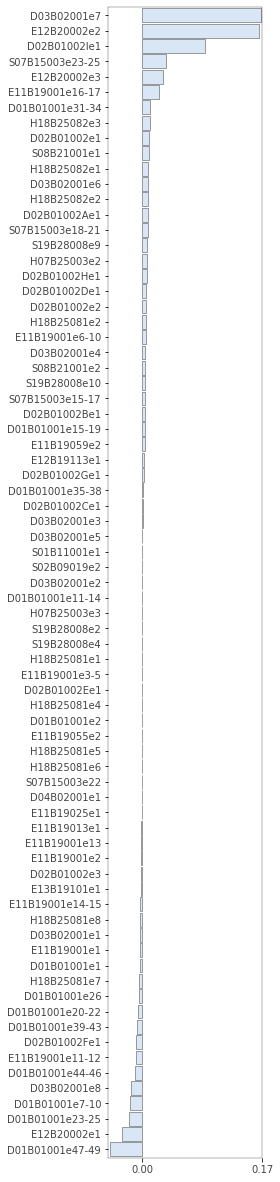

In [23]:
%time I = importances(rf, X_test, y_test)
viz = plot_importances(I)
#viz.save()

### Permutation importance with test set

In [25]:
scores = []
n_range = np.arange(10,len(X_test),1)
full_I = importances(rf, X_test, y_test)
for n in n_range:
    I = importances(rf, X_test, y_test, n_samples=n)
    e = mean_absolute_error(I.sort_index().Importance,full_I.sort_index().Importance)
    scores.append(e)
    print(f"MAE between subsample and full test importance n_samples={n}: {e:.4f}")

MAE between subsample and full test importance n_samples=10: 0.0233
MAE between subsample and full test importance n_samples=11: 0.0104
MAE between subsample and full test importance n_samples=12: 0.0092
MAE between subsample and full test importance n_samples=13: 0.0105
MAE between subsample and full test importance n_samples=14: 0.0084
MAE between subsample and full test importance n_samples=15: 0.0097


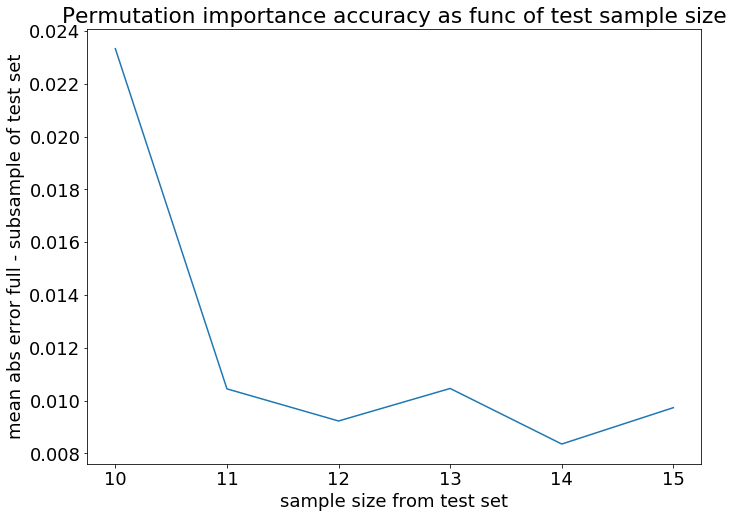

In [27]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (11,8)
rcParams["font.size"] = "18"
plt.plot(n_range, scores)
plt.ylabel("mean abs error full - subsample of test set")
plt.xlabel("sample size from test set")
plt.title("Permutation importance accuracy as func of test sample size")
plt.savefig("./rent-pimp-sample-size.svg")
plt.show()

Wall time: 1min 59s


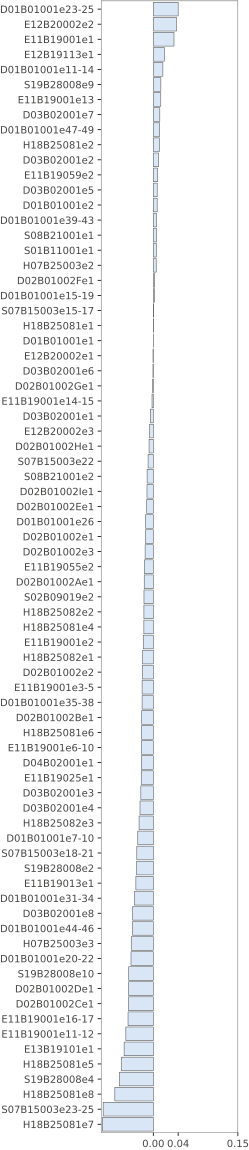

In [28]:
%time I = cv_importances(rf, X_train, y_train, k=5)
plot_importances(I)

Wall time: 25.1 s


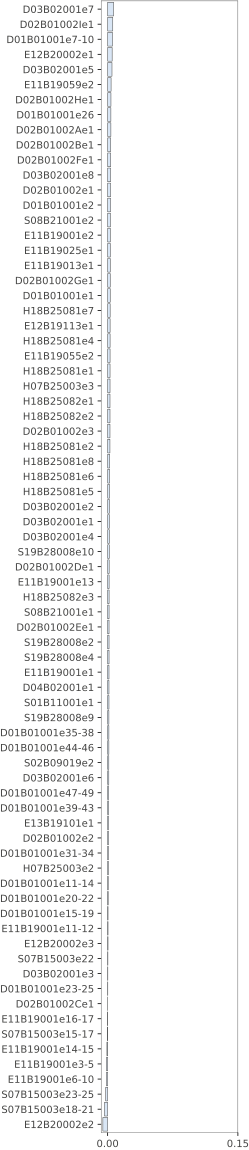

In [29]:
rf = RandomForestRegressor(oob_score=True, n_estimators=100)
%time I = dropcol_importances(rf, X_train, y_train)
plot_importances(I)

Wall time: 40.9 s


<Figure size 6400x4800 with 0 Axes>

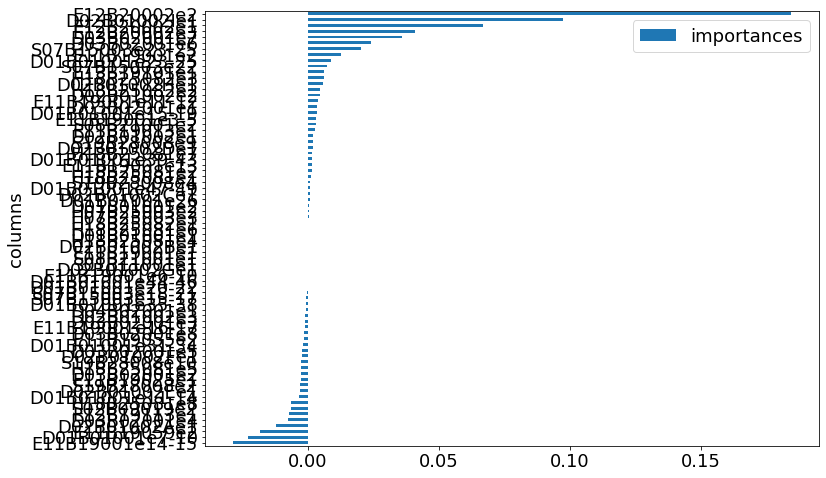

In [33]:
from eli5.sklearn import PermutationImportance
import eli5
from matplotlib.pyplot import figure
figure(num=None, figsize=(80, 60), dpi=80, facecolor='w', edgecolor='k')

%time perm = PermutationImportance(rf).fit(X_test, y_test)
I = pd.DataFrame(data={"columns":X_test.columns, "importances":perm.feature_importances_})
I = I.set_index("columns")
I = I.sort_values('importances', ascending=True)
I.plot.barh()

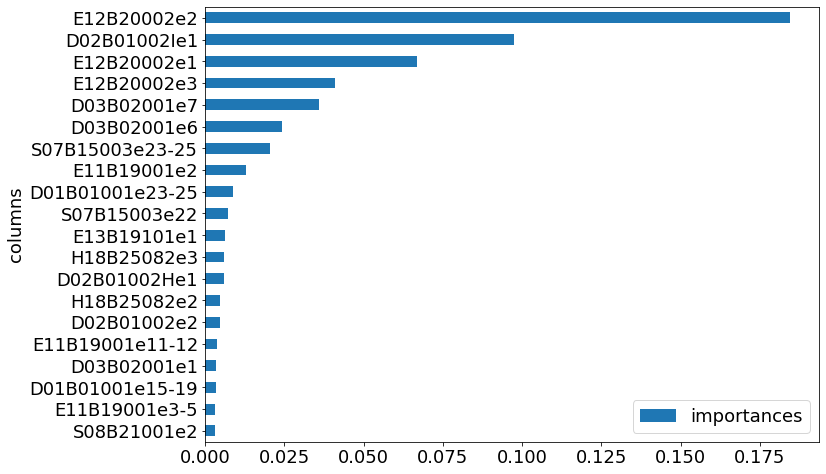

In [39]:
I = I.sort_values('importances', ascending=False)
I2 = I.head(20).sort_values('importances',ascending=True)
I2.plot.barh()
plt.savefig("./rent-pimp-sample-size2.svg")